<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Clase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ceros de Chebyshev e interpolación de Hermite

1. Primero acotamos el error en la interpolación de $f(x) = \frac{1}{(1+x)^2}$ con $x\in[0,3]$
  *   Usando nodos (puntos para interpolar) equiespaciados
  *   Usando los nodos de Chebyshev (las raíces del polinomio de     Chebyshev)

2. Vamos a la compu e implementamos funciones para estas cotas. De esta forma podemos calcular el grado del polinomio para que el error sea menor que uno deseado.

3. Para la funcion de l item 1 calculamos polinomio interpolante segun criterio de Chebyshev de grado 4 y en nodos equiespaciados y graficamos



In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.interpolate import lagrange



como $f^{(k)}(x)= (-1)^{k+1}\frac{(k+1)!}{(1+x)^{k+1}}$ tenemos como cotas para el error:

* Si usamos nodos equiespaciados en $[0,3]$ tenemos dos cotas conocidas, una mas fina que la otra
$$
|r_n(x)|\leq \frac{n!(n+2)}{4}\left(\frac{3}{n}\right)^{n+1}
$$

$$
|r_n(x)|\leq (n+2)\left(\frac{3}{2}\right)^{n+1}
$$

* si usamos como nodos las raices de Chebyshev en $[0, 3]$:
$$
|r_n(x)|\leq \frac{(n+2)}{2^{n+1}}\left(\frac{3}{2}\right)^{n+1}
$$


In [2]:
def cota_equi(n):
    
    cota = factorial(n)*(n+2)/4*(3/n)**(n+1)
    
    return cota

def cota_cheby(n):

    cota = ((n+2)*(3/2)**(n+1))/(2**n)

    return cota

def cota_equi2(n):

    cota = (3/2)**(n+1)*(n+2)

    return cota


In [3]:
cotaequi = [cota_equi(n) for n in range(1,8)]
cotaequi2 = [cota_equi2(n) for n in range(1,8)]
cotacheby = [cota_cheby(n) for n in range(1,8)]

print(cotaequi)
print(cotaequi2)
print(cotacheby)

[6.75, 6.75, 7.5, 8.54296875, 9.797759999999998, 11.25, 12.906211333227281]
[6.75, 13.5, 25.3125, 45.5625, 79.734375, 136.6875, 230.66015625]
[3.375, 3.375, 3.1640625, 2.84765625, 2.49169921875, 2.1357421875, 1.802032470703125]


Ahora calculemos el grado del polinomio interpolador (en los nodos de Chebyshev) si se desea un error de como mucho $10^{-3}$:

In [4]:
error = 1e-3

n = 1

while cota_cheby(n) > error:
  n = n+1

print("el grado es: ", n)

el grado es:  39


Ahora vamos a calcular el polinio interpolador usando los nodos de Chebyshev. Para esto necesitamos calcular de forma automatizada los ceros!

## Implementemos una función que nos de el polinomio de Chebyshev de grado n

In [5]:
def Cheby(n,x):
    
    if n == 0:
        T = 1
    elif n == 1:
        T = x
    else: 
        T = 2*x*Cheby(n-1,x) - Cheby(n-2,x)
    return T

Versión pro! de esta función: queremos que nos devuelva un objeto polinomio de python!

In [6]:
def Chebyshev(n):
    if n == 0:
        return(np.poly1d([1]))
    if n == 1:
        return(np.poly1d([1,0]))
    else:
        px = np.poly1d([1,0])
        return(2 * px * Chebyshev(n-1) - Chebyshev(n-2))


In [7]:
print(Chebyshev(5))

    5      3
16 x - 20 x + 5 x


Como Chebyshev(n) me devuelve un objeto polinomio, le podemos pedir que nos de sus raices. Esto se llama aplicarle un metodo a un objeto de python:

In [19]:
n = 5
raices = Chebyshev(n).r   # son las raices del polinomio T_5 en el [-1,1]

print(raices)

print([np.cos((2*k+1)*np.pi/(2*n)) for k in range(n)])

[-0.95105652 -0.58778525  0.95105652  0.58778525  0.        ]
[0.9510565162951535, 0.5877852522924731, 6.123233995736766e-17, -0.587785252292473, -0.9510565162951535]


Si queremos las raices de este polinomio en $[a,b]$ le aplicamos la transformacion $h(t)=\frac{b-a}{2}t + \frac{a+b}{2}$ a cada una de las xi calculadas en la celda de arriba:

In [20]:
a = 0
b = 3

xi = (b-a)/2*raices +(a+b)/2
print(xi) 

[0.07341523 0.61832212 2.92658477 2.38167788 1.5       ]


Ahora le pedimos a python que nos fitee un polinomio (nos de un polinomio interpolador) en esos nodos. El polinomio es de grado $\leq 4$ 

podemos usar la funcion lagrange de scipy.interpolate o la funcion polyfit de numpy

In [23]:
func = lambda x: 1/(1+x)**2

yi = func(xi)

In [25]:
# El polinomio interpolador en estos nodos es:

P = lagrange(xi, yi)

In [26]:
print(P)

         4          3         2
0.04335 x - 0.3511 x + 1.057 x - 1.483 x + 0.9712


Grafiquemos $f$ y su polinomio de Lagrange

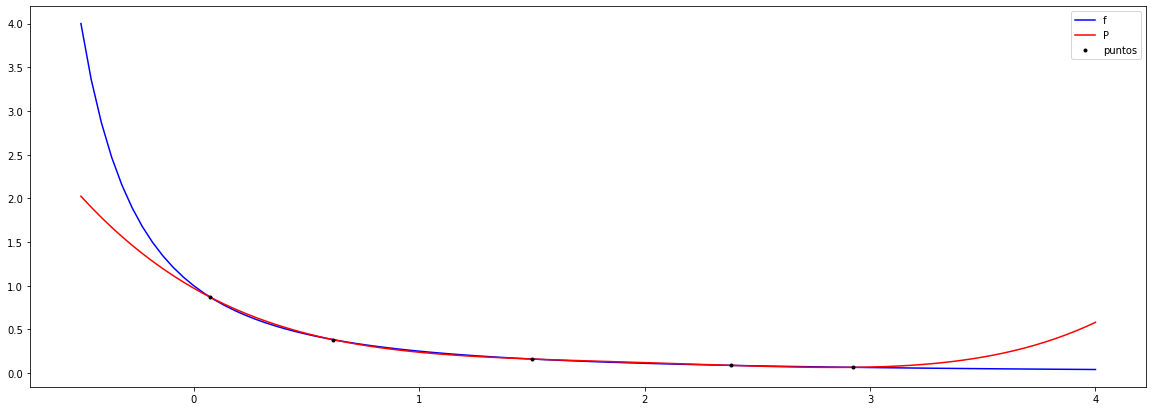

In [35]:
grilla_x = np.linspace(-1/2, 4, 100)


plt.figure(figsize = (20, 7))
plt.plot(grilla_x, func(grilla_x), label = "f", color = "b")
plt.plot(grilla_x, P(grilla_x), label = "P", color = "red")
plt.plot(xi, yi, '.', label ="puntos", color = "black")
plt.legend()
plt.show()

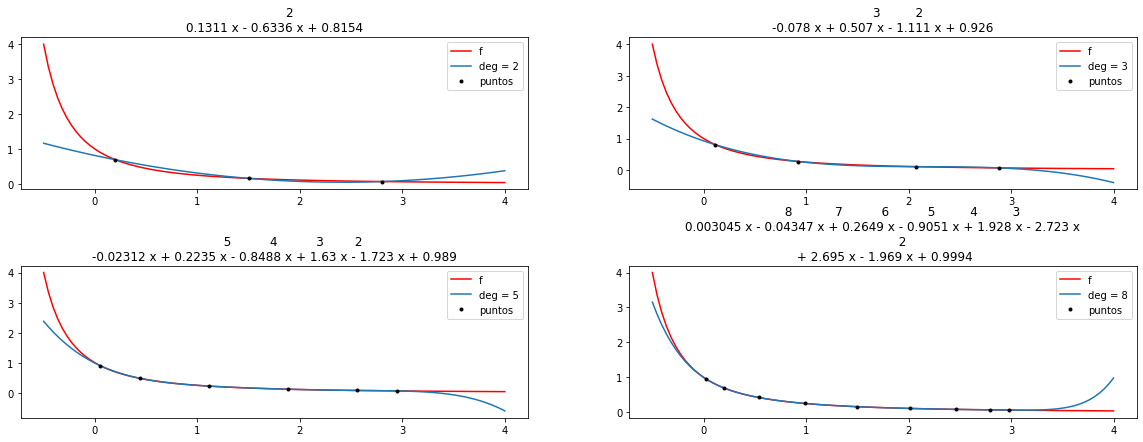

In [59]:
# ploteemos para distintos grados: para esto definamos primero la transformacion h en forma de funcion de python:
a = 0
b = 3
h = lambda x: (b-a)/2*x +(a+b)/2 # manda los x de [-1,1] al intervalo [a, b]

grilla_x = np.linspace(-0.5, 4, 100)

grados = [2,3,5,8] 

plt.figure(figsize = (20, 7))
plt.subplots_adjust(hspace=0.5)
for i,k in enumerate(grados):
  
  raices = Chebyshev(k+1).r  #hallamos las raices del polinomio de grado k+1, eso me da k+1 nodos y me permite calcular un P_k
  xi = h(raices)
  yi = func(xi)
  
  P = lagrange(xi, yi)  # hallo el poli interpolante en los xi, yi
  

  plt.subplot(2,2,i+1)
  plt.plot(grilla_x, func(grilla_x), label = "f", color = "r")
  plt.plot(grilla_x, P(grilla_x), label = "deg = "+ str(k))
  plt.plot( xi, yi, '.', label ="puntos", color = "black")
  plt.legend()
  plt.title(str(P))

plt.show()




### Ejercicio: Hallar el polinomio interpolador en nodos de Chebyshev para $f(x) =\frac{1}{1+25x^2}$ en el intervalo $[-1,1]$ de grado $n=2,3,5,7$ y graficarlos junto con la $f$ y los puntos de interpolacion.

Estimar usando la funcion np.max de python el error de interpolacion y calcular las cotas para cada caso. Comparar.

<p>
</p>



---



---




## Interpolación de Hermite
